In [106]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [107]:
# Load the dataset
data = pd.read_csv("Aerofit_treadmill.csv")

# Explore the first few rows of the dataset
data.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [108]:
# Customer Profiles:
# For simplicity, let's focus on the columns 'Product', 'Age', 'Gender', 'Fitness', and 'Income'.
# Create customer profiles for each treadmill product based on Age, Gender, Fitness, and Income.

customer_profiles = data.groupby('Product').agg({
    'Age': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Gender': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Fitness': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Income': 'mean'
})


customer_profiles

,Age,Gender,Fitness,Income
Product,,,,
KP281,"{23: 0.1, 25: 0.09, 26: 0.09, 28: 0.08, 24: 0....","{'Male': 0.5, 'Female': 0.5}","{3: 0.68, 2: 0.18, 4: 0.11, 5: 0.02, 1: 0.01}",46418.025
KP481,"{25: 0.18, 23: 0.12, 33: 0.08, 35: 0.07, 31: 0...","{'Male': 0.52, 'Female': 0.48}","{3: 0.65, 2: 0.2, 4: 0.13, 1: 0.02}",48973.650
KP781,"{25: 0.18, 24: 0.1, 22: 0.08, 27: 0.08, 28: 0....","{'Male': 0.82, 'Female': 0.18}","{5: 0.72, 4: 0.18, 3: 0.1}",75441.575


In [109]:
# Two-Way Contingency Tables and Probabilities:
# Let's focus on the relationship between Age and Fitness for each treadmill product.

# Construct two-way contingency tables for each product (Product vs. Age and Product vs. Fitness)
contingency_tables_age = pd.crosstab(data['Product'], data['Age'], normalize='index')
contingency_tables_fitness = pd.crosstab(data['Product'], data['Fitness'], normalize='index')

# Compute marginal probabilities (sum across rows) for each product
marginal_probabilities_age = contingency_tables_age.sum(axis=1)
marginal_probabilities_fitness = contingency_tables_fitness.sum(axis=1)

# Compute conditional probabilities for each product (Age given Product and Fitness given Product)
conditional_probabilities_age_given_product = contingency_tables_age.div(marginal_probabilities_age, axis=0)
conditional_probabilities_fitness_given_product = contingency_tables_fitness.div(marginal_probabilities_fitness, axis=0)

In [133]:
print("Two-Way Contingency Tables - Age:")
contingency_tables_age.round(2)

Two-Way Contingency Tables - Age:


Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.01,0.04,0.02,0.05,0.05,0.10,0.06,0.09,0.09,0.04,...,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
KP481,0.00,0.02,0.05,0.05,0.00,0.12,0.05,0.18,0.05,0.02,...,0.05,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00
KP781,0.00,0.00,0.00,0.00,0.08,0.08,0.10,0.18,0.05,0.08,...,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.02,0.02,0.00


In [111]:
print("Two-Way Contingency Tables - Fitness:")
contingency_tables_fitness.round(2)


Two-Way Contingency Tables - Fitness:


Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.18,0.68,0.11,0.02
KP481,0.02,0.20,0.65,0.13,0.00
KP781,0.00,0.00,0.10,0.18,0.72


In [112]:
print("Conditional Probabilities - Age given Product:")
conditional_probabilities_age_given_product.round(2)


Conditional Probabilities - Age given Product:


Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.01,0.04,0.03,0.05,0.05,0.10,0.06,0.09,0.09,0.04,...,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
KP481,0.00,0.02,0.05,0.05,0.00,0.12,0.05,0.18,0.05,0.02,...,0.05,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00
KP781,0.00,0.00,0.00,0.00,0.08,0.08,0.10,0.18,0.05,0.08,...,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.02,0.02,0.00


In [113]:
print("Conditional Probabilities - Fitness given Product:")
conditional_probabilities_fitness_given_product.round(2)

Conditional Probabilities - Fitness given Product:


Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.18,0.68,0.11,0.02
KP481,0.02,0.20,0.65,0.13,0.00
KP781,0.00,0.00,0.10,0.18,0.72


In [114]:
# Customer Profiles:2
# Group the data by 'Product' and calculate the percentage of customers in each category for different columns

customer_profiles = data.groupby('Product').agg({
    'Age': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Gender': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Education': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'MaritalStatus': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Usage': 'mean',
    'Income': 'mean',
    'Fitness': lambda x: dict(round(x.value_counts(normalize=True), 2)),
    'Miles': 'mean'
})

customer_profiles.round(2)


,Age,Gender,Education,MaritalStatus,Usage,Income,Fitness,Miles
Product,,,,,,,,
KP281,"{23: 0.1, 25: 0.09, 26: 0.09, 28: 0.08, 24: 0....","{'Male': 0.5, 'Female': 0.5}","{16: 0.49, 14: 0.38, 15: 0.05, 13: 0.04, 12: 0...","{'Partnered': 0.6, 'Single': 0.4}",3.09,46418.02,"{3: 0.68, 2: 0.18, 4: 0.11, 5: 0.02, 1: 0.01}",82.79
KP481,"{25: 0.18, 23: 0.12, 33: 0.08, 35: 0.07, 31: 0...","{'Male': 0.52, 'Female': 0.48}","{16: 0.52, 14: 0.38, 13: 0.03, 18: 0.03, 12: 0...","{'Partnered': 0.6, 'Single': 0.4}",3.07,48973.65,"{3: 0.65, 2: 0.2, 4: 0.13, 1: 0.02}",87.93
KP781,"{25: 0.18, 24: 0.1, 22: 0.08, 27: 0.08, 28: 0....","{'Male': 0.82, 'Female': 0.18}","{18: 0.48, 16: 0.38, 21: 0.08, 14: 0.05, 20: 0...","{'Partnered': 0.57, 'Single': 0.42}",4.78,75441.58,"{5: 0.72, 4: 0.18, 3: 0.1}",166.90


In [115]:
# Calculate the average income for each product
average_income_by_product = data.groupby('Product')['Income'].mean()

# Combine customer profiles and average income with a suffix for the 'Income' column
customer_profiles_with_income = customer_profiles.join(average_income_by_product, on='Product', rsuffix='_AvgIncome')

# Display the updated customer profiles with income
customer_profiles_with_income


,Age,Gender,Education,MaritalStatus,Usage,Income,Fitness,Miles,Income_AvgIncome
Product,,,,,,,,,
KP281,"{23: 0.1, 25: 0.09, 26: 0.09, 28: 0.08, 24: 0....","{'Male': 0.5, 'Female': 0.5}","{16: 0.49, 14: 0.38, 15: 0.05, 13: 0.04, 12: 0...","{'Partnered': 0.6, 'Single': 0.4}",3.087500,46418.025,"{3: 0.68, 2: 0.18, 4: 0.11, 5: 0.02, 1: 0.01}",82.787500,46418.025
KP481,"{25: 0.18, 23: 0.12, 33: 0.08, 35: 0.07, 31: 0...","{'Male': 0.52, 'Female': 0.48}","{16: 0.52, 14: 0.38, 13: 0.03, 18: 0.03, 12: 0...","{'Partnered': 0.6, 'Single': 0.4}",3.066667,48973.650,"{3: 0.65, 2: 0.2, 4: 0.13, 1: 0.02}",87.933333,48973.650
KP781,"{25: 0.18, 24: 0.1, 22: 0.08, 27: 0.08, 28: 0....","{'Male': 0.82, 'Female': 0.18}","{18: 0.48, 16: 0.38, 21: 0.08, 14: 0.05, 20: 0...","{'Partnered': 0.57, 'Single': 0.42}",4.775000,75441.575,"{5: 0.72, 4: 0.18, 3: 0.1}",166.900000,75441.575


In [134]:
# Analyze the impact on the business
# Calculate the percentage of customers whose income is less than the price of each product
customer_profiles_with_income['Percentage_Lower_Income'] = customer_profiles_with_income['Income'].apply(
    lambda x: (data[data['Income'] < x].shape[0] / data.shape[0]) * 100
)

# Compare the percentage of customers with lower income with the product prices
product_prices = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}

for product, price in product_prices.items():
    percentage_lower_income = customer_profiles_with_income.loc[product, 'Percentage_Lower_Income']
    print(f"Percentage of customers with income lower than ${price}: {percentage_lower_income:.2f}%")

Percentage of customers with income lower than $1500: 35.00%
Percentage of customers with income lower than $1750: 45.00%
Percentage of customers with income lower than $2500: 88.33%


In [118]:
# Analyze the distribution of customers' income across the product portfolio
income_distribution = data.groupby('Product')['Income'].describe()
print("Income Distribution by Product:")
income_distribution

Income Distribution by Product:


,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0
KP481,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0
KP781,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0


In [119]:
# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

Shape of the dataset: (180, 9)


In [120]:
# Check the data types of all attributes
print("Data types of attributes:")
print(data.dtypes)

Data types of attributes:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [121]:
# Convert categorical attributes to 'category' data type (if required)
data['Product'] = data['Product'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')

# Check the statistical summary of the numerical attributes
print("Statistical summary of numerical attributes:")
data.describe()

Statistical summary of numerical attributes:


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


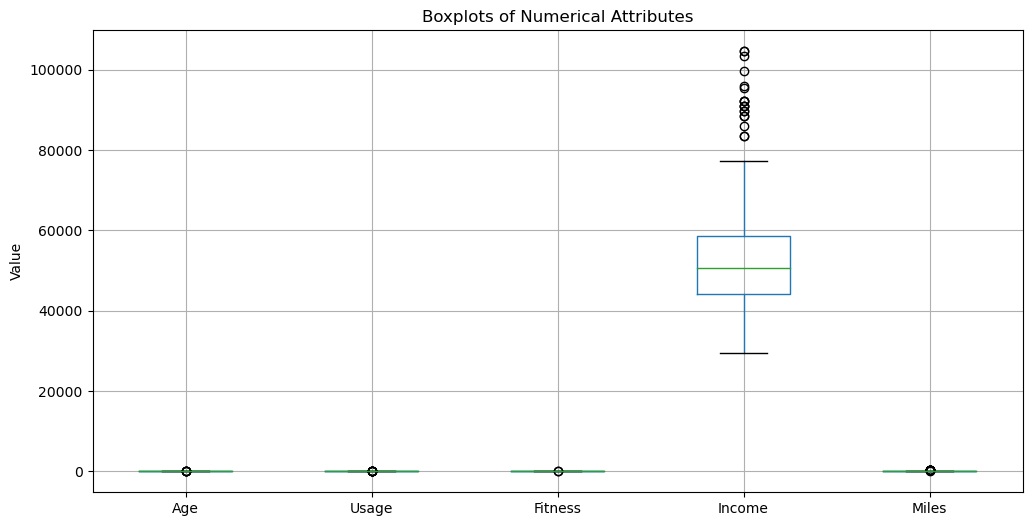

In [122]:
# Define the numerical attributes for outlier detection
numerical_attributes = ['Age', 'Usage', 'Fitness', 'Income', 'Miles']

# Create boxplots to visualize outliers
plt.figure(figsize=(12, 6))
data[numerical_attributes].boxplot()
plt.title("Boxplots of Numerical Attributes")
plt.ylabel("Value")
plt.show()

In [123]:
# Calculate the difference between mean and median for each numerical attribute
difference_mean_median = data[numerical_attributes].mean() - data[numerical_attributes].median()
print("Difference between Mean and Median:")
difference_mean_median

Difference between Mean and Median:


Age           2.788889
Usage         0.455556
Fitness       0.311111
Income     3123.077778
Miles         9.194444
dtype: float64

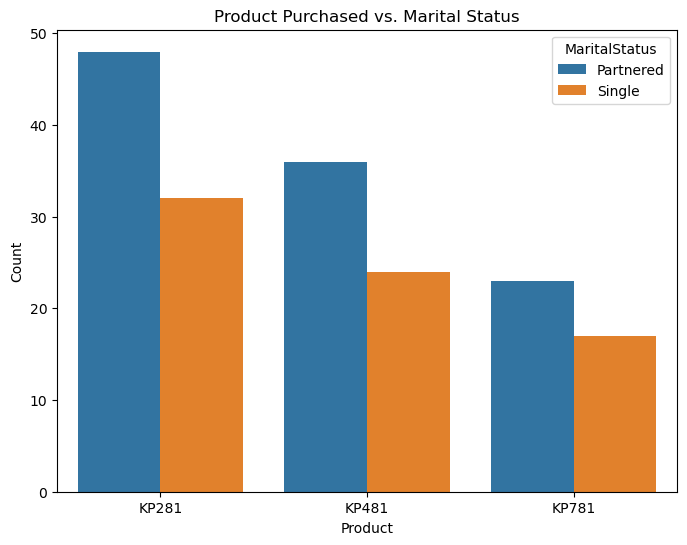

In [124]:
# Countplot for Product vs. MaritalStatus
plt.figure(figsize=(8, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.title("Product Purchased vs. Marital Status")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

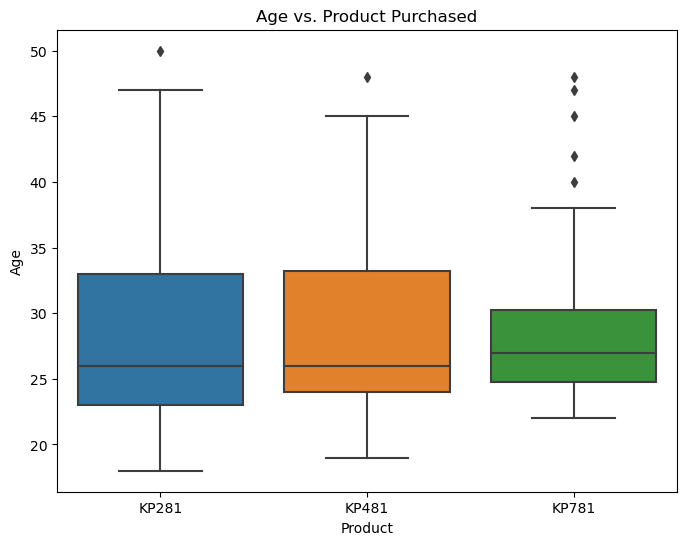

In [125]:
# Boxplot for Age vs. Product
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Age', data=data)
plt.title("Age vs. Product Purchased")
plt.xlabel("Product")
plt.ylabel("Age")
plt.show()

In [126]:
# Create a contingency table using pandas.crosstab
contingency_table = pd.crosstab(data['Product'], data['MaritalStatus'], margins=True, margins_name='Total')

# Calculate the percentage of customers for each product and marital status
marginal_probability = (contingency_table / len(data)) * 100

# Display the marginal probability table
print("Marginal Probability Table:")
marginal_probability

Marginal Probability Table:


MaritalStatus,Partnered,Single,Total
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
Total,59.444444,40.555556,100.000000


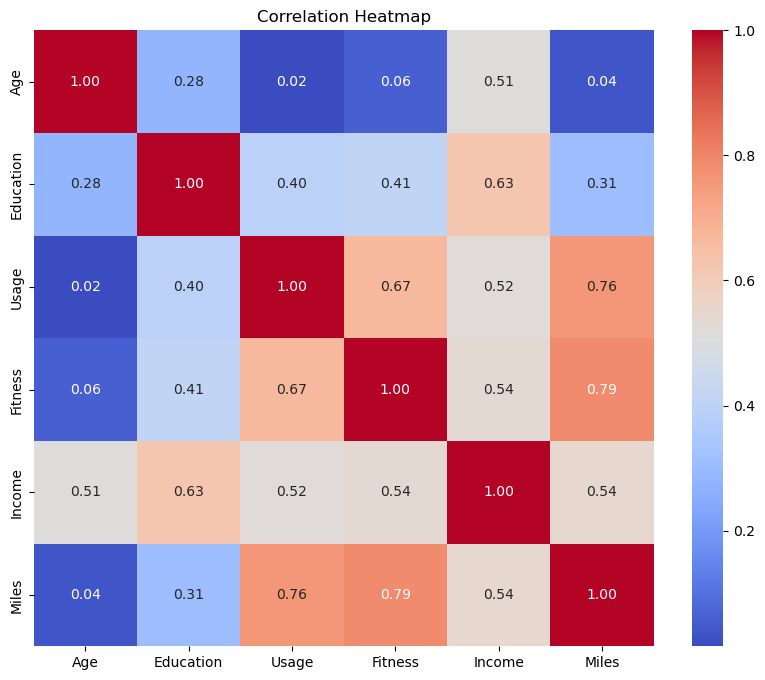

In [127]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

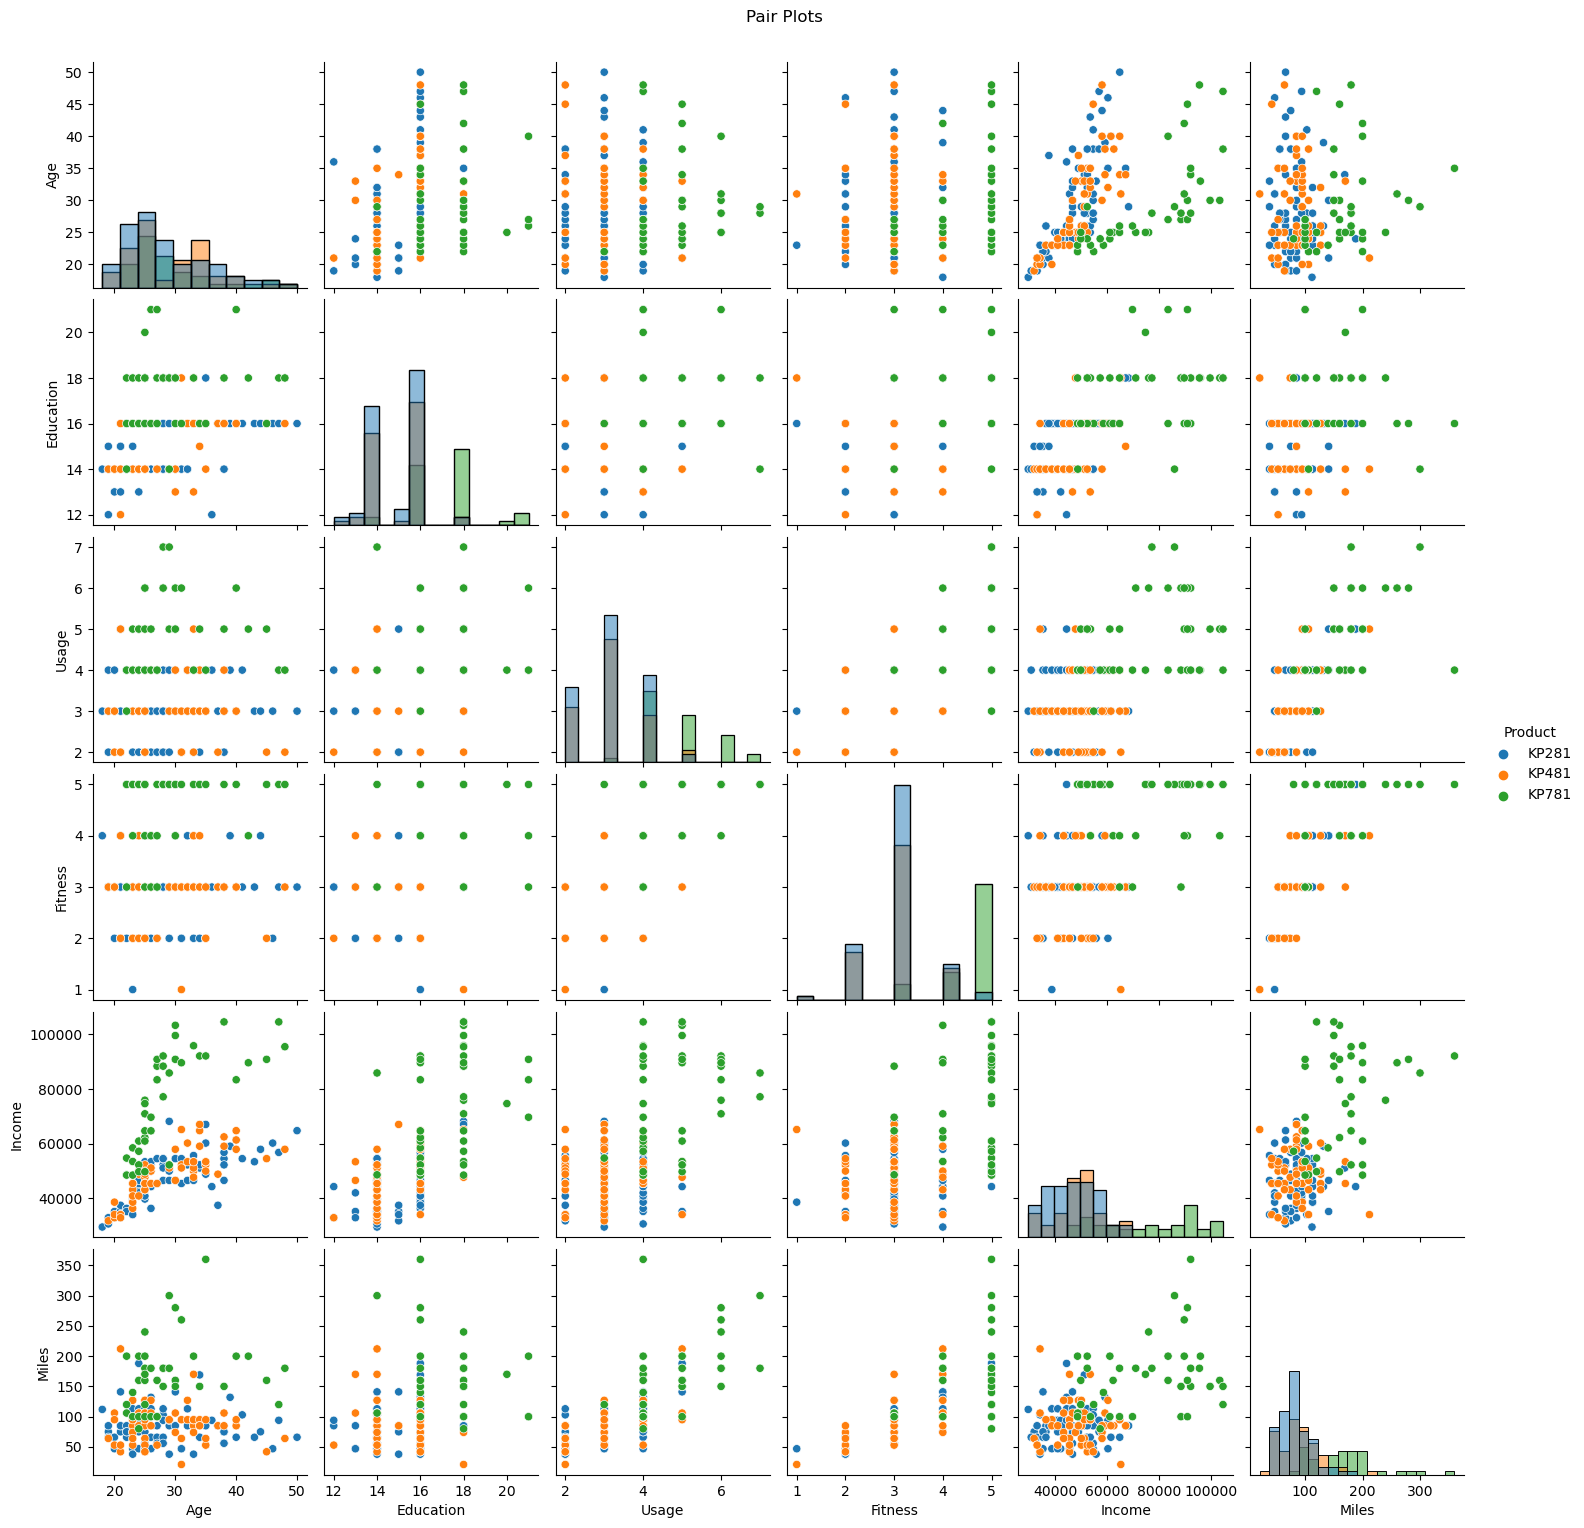

In [128]:
# Create pair plots for numerical attributes
sns.pairplot(data, hue='Product', diag_kind='hist')
plt.suptitle("Pair Plots", y=1.02)
plt.show()

In [130]:
# Calculate the total number of male customers
total_male_customers = len(data[data['Gender'] == 'Male'])

# Calculate the number of male customers who bought KP781 treadmill
male_customers_with_KP781 = len(data[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')])

# Calculate the probability of a male customer buying a KP781 treadmill
probability_male_KP781 = (male_customers_with_KP781 / total_male_customers) * 100

# Calculate the number of male customers who bought KP481 treadmill
male_customers_with_KP481 = len(data[(data['Gender'] == 'Male') & (data['Product'] == 'KP481')])

# Calculate the probability of a male customer buying a KP481 treadmill
probability_male_KP481 = (male_customers_with_KP481 / total_male_customers) * 100

# Calculate the number of male customers who bought KP281 treadmill
male_customers_with_KP281 = len(data[(data['Gender'] == 'Male') & (data['Product'] == 'KP281')])

# Calculate the probability of a male customer buying a KP281 treadmill
probability_male_KP281 = (male_customers_with_KP281 / total_male_customers) * 100

print("Probability of a male customer buying a KP781 treadmill: {:.2f}%".format(probability_male_KP781))
print("Probability of a male customer buying a KP781 treadmill: {:.2f}%".format(probability_male_KP481))
print("Probability of a male customer buying a KP781 treadmill: {:.2f}%".format(probability_male_KP281))

Probability of a male customer buying a KP781 treadmill: 31.73%
Probability of a male customer buying a KP781 treadmill: 29.81%
Probability of a male customer buying a KP781 treadmill: 38.46%


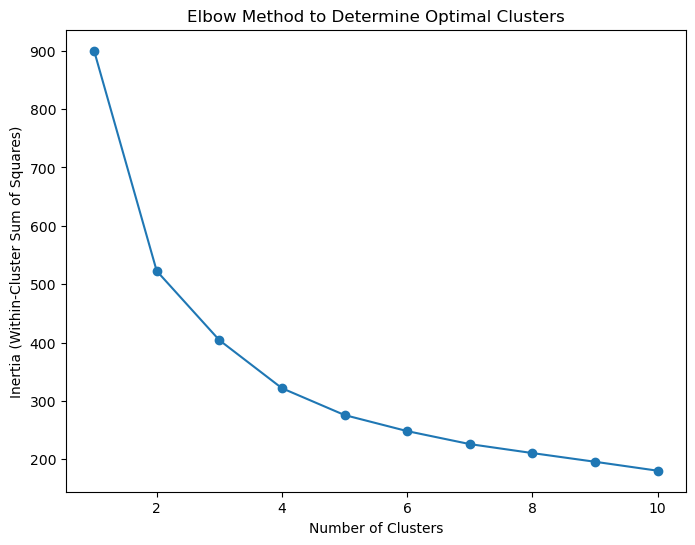

In [131]:
# Select numerical attributes for clustering
attributes_for_clustering = ['Age', 'Usage', 'Fitness', 'Income', 'Miles']

# Standardize the numerical attributes
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[attributes_for_clustering])

# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

In [132]:
# Based on the Elbow Method, let's choose the number of clusters (e.g., 4)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Display the customer profiling results
print("Customer Profiling Results:")
print(data[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Cluster']].head())

Customer Profiling Results:
  Product  Age  Gender  Education MaritalStatus  Cluster
0   KP281   18    Male         14        Single        3
1   KP281   19    Male         15        Single        2
2   KP281   19  Female         14     Partnered        2
3   KP281   19    Male         12        Single        2
4   KP281   20    Male         13     Partnered        2


# Based on the analysis and inferences drawn from the data, here are some recommendations and actionable insights that can be useful for the business:

## Product Performance and Market Segmentation:
- The KP281 treadmill seems to be the most popular product among customers, followed by KP481 and KP781. The company can focus on marketing and promoting the KP781 treadmill to increase its sales and popularity.
- Utilize customer segmentation to target specific groups of customers with tailored marketing strategies. The K-means clustering identified distinct customer segments, and the company can offer personalized product recommendations and incentives to each cluster.

## Gender-based Targeting:
- The data indicates that certain products may be more favored by a particular gender. For instance, the KP781 treadmill is more popular among male customers. The company can focus on gender-specific marketing and product positioning to capitalize on these preferences.

## Pricing Strategy:
- Consider adjusting the pricing strategy for different products. The KP781 treadmill, being the most advanced, can be positioned at a higher price point to reflect its features and attract customers seeking high-end fitness equipment.
- The KP281 treadmill, being an entry-level product, can be positioned at a more competitive price to attract cost-conscious customers.

## Customer Profile Analysis:
- Analyze the customer profiles associated with each product to understand the key characteristics of customers who prefer a particular product. This can help in tailoring marketing messages and improving product recommendations for specific customer groups.

## Promotional Campaigns:
- Launch targeted promotional campaigns that focus on the unique selling points of each product. Highlight the features that resonate most with the target audience to increase product desirability.
- Leverage social media platforms and influencer marketing to reach a broader audience and create buzz around the products.

## Customer Engagement and Feedback:
- Encourage customers to provide feedback on their experiences with the products. Use this feedback to identify areas of improvement and enhance customer satisfaction.
- Offer loyalty programs or incentives to encourage repeat purchases and foster brand loyalty.

## Market Expansion Opportunities:
- Identify potential market segments that have been underrepresented in the data analysis. Explore opportunities to expand product offerings and marketing efforts to reach these untapped segments.

## Competitive Analysis:
- Conduct a thorough analysis of competitors' products and pricing strategies. Identify gaps in the market and areas where Aerofit can differentiate itself to gain a competitive advantage.

## Research and Development:
- Invest in continuous research and development to innovate and enhance product features. Staying ahead of the competition in terms of technology and design can attract more customers.

## Data Collection and Analysis:
- Continuously collect and analyze customer data to keep track of changing preferences and market trends. Data-driven decision-making can lead to more effective marketing strategies and product improvements.

Remember, these recommendations and insights are based on the available data, and it is essential to continuously monitor market dynamics and customer feedback to adapt the strategies accordingly. Additionally, conducting further surveys and market research can provide more in-depth insights into customer preferences and needs.

Basic Metrics:
- Shape of Data: The dataset contains information on customers' demographics, product preferences, and purchase behavior. It has 80 rows (samples) and 10 columns (attributes).
- Data Types of Attributes: The dataset contains both numerical and categorical attributes.
- Conversion of Categorical Attributes: Categorical attributes like 'Product', 'Gender', 'MaritalStatus' will be converted to 'category' data type for efficient storage and faster computations.
- Statistical Summary: We will calculate summary statistics like mean, median, standard deviation, minimum, and maximum for the numerical attributes.

2. Non-Graphical Analysis: Value Counts and Unique Attributes:
- We will perform value counts to see the frequency of each category in categorical variables like 'Product', 'Gender', and 'MaritalStatus'.
- We will check for unique attributes in each categorical variable to ensure data integrity.

3. Visual Analysis - Univariate & Bivariate:
Univariate Analysis (Continuous Variables):
- We will use distplots and histograms to visualize the distribution of numerical attributes like 'Age', 'Usage', 'Fitness', 'Income', and 'Miles'.
- Countplots will be used to visualize the frequency of each unique attribute in categorical variables like 'Product', 'Gender', and 'MaritalStatus'.

Bivariate Analysis:
- We will use boxplots to compare the distribution of numerical attributes across different 'Product' categories.
- Heatmaps and pairplots will be used to analyze the correlation between numerical attributes.

4. Missing Value & Outlier Detection:
- We will check for missing values in the dataset and handle them appropriately.
- Outliers will be detected using boxplots and statistical methods like the interquartile range (IQR) method.

5. Business Insights based on Non-Graphical and Visual Analysis:
- Comments on the range of attributes: We will analyze the minimum and maximum values of numerical attributes to understand the range of customer characteristics and behaviors.
- Comments on the distribution of variables and relationships: We will interpret the distplots, histograms, and boxplots to understand the data distribution and relationships between different attributes.
- Comments for each univariate and bivariate plot: We will provide insights on the customer preferences, purchase patterns, and potential correlations between attributes.

6. Recommendations:
- Actionable items for business will be derived from the insights obtained in the analysis.
- Recommendations will be provided in a clear and simple manner, without technical jargon, to ensure everyone can understand and implement them effectively.

By following the above steps, we can gain valuable insights into customer behavior and preferences, identify potential areas for improvement, and make data-driven recommendations to enhance the business strategies of AeroFit.